## Initialisation

In [80]:
import pandas as pd
import sqlalchemy
import mysql.connector


import sys
sys.path.insert(0,"/home/apprenant/PycharmProjects/american-dream")

from src.d00_utils.mysql_utils import connect_to_mysql,save_to_mysql

db_connection = connect_to_mysql()

## Importation des données de sql vers dataframe

In [81]:
df_survey = pd.read_sql("survey",con=db_connection)
df_analyst = pd.read_sql("analyst",con=db_connection)

In [82]:
#verification de la bonne création des dataframes
print(df_survey.head())
print(df_survey.columns)

   index  Survey Year           Timestamp  SalaryUSD        Country  \
0      0         2020 2020-01-04 18:50:34   115000.0  United States   
1      1         2020 2020-01-04 10:43:02   100000.0  United States   
2      2         2020 2020-01-04 09:51:46   100000.0          Spain   
3      3         2020 2020-01-04 01:08:54    70000.0  United States   
4      4         2020 2020-01-03 15:28:54   110000.0  United States   

  PostalCode       PrimaryDatabase  YearsWithThisDatabase  \
0         03  Microsoft SQL Server                     15   
1       None                 Other                      6   
2      28046  Microsoft SQL Server                      2   
3      94133  Microsoft SQL Server                      3   
4      95354                Oracle                     30   

                                      OtherDatabases    EmploymentStatus  ...  \
0  Microsoft SQL Server, MongoDB, Azure SQL DB (a...  Full time employee  ...   
1                                      MySQL

In [83]:
#verification de la bonne création du dataframe analyst
#print(df_analyst.head())

## Selectionner parmis les tables les colonnes qui de près ou de loin pourraient être intéressantes pour l'étude 

je supprime les colonnesqui ne me semblent pas pertinentes

In [84]:
df_cleaned_survey = df_survey.drop(columns=['Survey Year','Timestamp', 'PrimaryDatabase','YearsWithThisDatabase','OtherDatabases',
                                            'OtherDatabases','EmploymentStatus','ManageStaff','CompanyEmployeesOverall',
                                            'DatabaseServers','Education','EducationIsComputerRelated','Certifications',
                                            'TelecommuteDaysPerWeek','NewestVersionInProduction',
                                            'OldestVersionInProduction','PopulationOfLargestCityWithin20Miles',
                                            'EmploymentSector','OtherJobDuties','KindsOfTasksPerformed','Counter'])
print(df_cleaned_survey.head())

   index  SalaryUSD        Country PostalCode  \
0      0   115000.0  United States         03   
1      1   100000.0  United States       None   
2      2   100000.0          Spain      28046   
3      3    70000.0  United States      94133   
4      4   110000.0  United States      95354   

                                            JobTitle  YearsWithThisTypeOfJob  \
0  DBA (Production Focus - build & troubleshoot s...                       5   
1                  Developer: App code (C#, JS, etc)                       6   
2                                              Other                       3   
3                                            Analyst                       3   
4  DBA (General - splits time evenly between writ...                      25   

                                    HowManyCompanies OtherPeopleOnYourTeam  \
0  1 (this is the only company where I've had thi...                     2   
1  1 (this is the only company where I've had thi...           More 

## Vérifier si il existe des colonnes en doublon

In [85]:
print(df_cleaned_survey.duplicated().value_counts())

False    8627
dtype: int64


il n'y a aps de colonne en doublon

## Vérifier si il y a des doublons de ligne

In [86]:
print(df_cleaned_survey.duplicated('index').value_counts())

False    8627
dtype: int64


il n'y a pas de lignes en doublon

## Rechercher s'il y a des colonnes qu'il faudrait transformer en datetime

In [87]:
print(df_cleaned_survey.dtypes)

index                       int64
SalaryUSD                 float64
Country                    object
PostalCode                 object
JobTitle                   object
YearsWithThisTypeOfJob      int64
HowManyCompanies           object
OtherPeopleOnYourTeam      object
HoursWorkedPerWeek         object
LookingForAnotherJob       object
CareerPlansThisYear        object
Gender                     object
dtype: object


il n'y a pas de colonne contenant des données temporelles

## Vérifier la consistence des données

je vérifie que la colonne pays ne comporte que des informations américaines

In [88]:
print(df_cleaned_survey.Country.unique())
print(len(df_cleaned_survey),"lignes")

['United States' 'Spain' 'Portugal' 'United Kingdom' 'Canada'
 'Netherlands' 'Austria' 'Belgium' 'France' 'Romania' 'Denmark' 'Israel'
 'Australia' 'New Zealand' 'Anguilla' 'Sweden' 'Turkey' 'India' 'Ireland'
 'Germany' 'Saudi Arabia' 'Russia' 'Norway' 'Ukraine'
 'Serbia and Montenegro' 'Luxembourg' 'Poland' 'Slovakia' 'Costa Rica'
 'South Africa' 'Hungary' 'Brazil' 'Czech Republic' 'Croatia' 'Pakistan'
 'Lithuania' 'Macedonia' 'Italy' 'Switzerland' 'Georgia' 'Philippines'
 'Singapore' 'Mexico' 'Greece' 'Bulgaria' 'Argentina' 'Slovenia'
 'Puerto Rico' 'Swaziland' 'Armenia' 'Latvia' 'Iceland' 'Indonesia' 'Iran'
 'Maldives' 'Taiwan' 'Uruguay' 'Vanuatu' 'Cayman Islands' 'Colombia'
 'Ecuador' 'Peru' 'Qatar' 'Jersey' 'Finland' 'Guernsey' 'Hong Kong'
 'El Salvador' 'Uganda' 'Guatemala' 'Jordan' 'United Arab Emirates'
 'Malta' 'Belarus' 'Thailand' 'Dominican Republic' 'Ghana' 'Nepal'
 'Malaysia' 'Estonia' 'Jamaica' 'Nicaragua' 'Moldova' 'Bahrain' 'Syria'
 'Kenya' 'Bermuda' 'Venezuela' 'China'

je supprime toutes les lignes qui ne concerne pas les états unis

In [89]:
df_usa = df_cleaned_survey.loc[df_cleaned_survey['Country'] == "United States"]
print(df_usa.Country.unique())
print(len(df_usa),"lignes")

['United States']
5680 lignes


il ne reste plus que les lignes concernant les états unis

je vérifie la column gender

In [90]:
print(df_usa.Gender.unique())

['Male' 'Female' 'Non-binary/third gender' 'mosquito ' 'Prefer not to say'
 'I am Batman' 'human  This is also my race.' 'Attack helicopter' 'Dragon'
 'Meat Popsicle ' 'Attack Helicopter' 'This question is inappropriate. '
 'Cyborg' 'Vulcan' 'Any human one'
 'Attack Helicopter. (serious dude, gender questions?)' 'confused'
 'toad frog' 'Alien' 'Not Asked']


je vais remplacer les valeurs différentes de 'Male' ou 'Female' par 'Undefined' pour uniformiser les valeur

In [91]:
df_usa['Gender'] = df_usa['Gender'].apply(lambda x: 'Male' if x == 'Male' else 'Female'if x== 'Female' else 'Undefined')
print(df_usa.Gender.unique())

['Male' 'Female' 'Undefined']


<ipython-input-91-30bea1926bd2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usa['Gender'] = df_usa['Gender'].apply(lambda x: 'Male' if x == 'Male' else 'Female'if x== 'Female' else 'Undefined')


on constate qu'il ne reste que 3 valeurs dans la colonne gender, male, female et undefined.

## Vérifier les valeurs manquantes

In [92]:
print(df_usa.isnull().sum())

index                       0
SalaryUSD                   0
Country                     0
PostalCode                466
JobTitle                    0
YearsWithThisTypeOfJob      0
HowManyCompanies            0
OtherPeopleOnYourTeam       0
HoursWorkedPerWeek          0
LookingForAnotherJob        0
CareerPlansThisYear         0
Gender                      0
dtype: int64


seule la colonne PostalCode possède des valeurs nulles

In [93]:
nb_null = df_usa.PostalCode.isnull().sum()
nb_rows = len(df_usa)
print(nb_null," postalcode vides")
print(nb_rows, " lignes au total")
print("soit ",(nb_null*100)/nb_rows," % de valeurs vides")


466  postalcode vides
5680  lignes au total
soit  8.204225352112676  % de valeurs vides


je ne souhaite pas supprimer 8% des mes lignes donc je garde ces valeurs vides

## Rechercher les valeurs abbérantes et les traiter 

In [94]:
df_usa.describe()

,index,SalaryUSD,YearsWithThisTypeOfJob
count,5680.000000,5.680000e+03,5680.000000
mean,4287.502641,1.085790e+05,7.784859
std,2512.175427,5.910859e+04,6.792877
min,0.000000,0.000000e+00,0.000000
25%,2088.750000,8.500000e+04,3.000000
50%,4299.000000,1.030000e+05,5.000000
75%,6419.250000,1.250000e+05,10.000000
max,8626.000000,1.850000e+06,45.000000


la seule donnée qui pourrait présenter des valeurs abberantes est "salaryUSD", en effet les chiffres de la colonne "YearsWithThisTypeOfJob" semblent cohérents

seule la visualisation permet de detecter les données abberantes

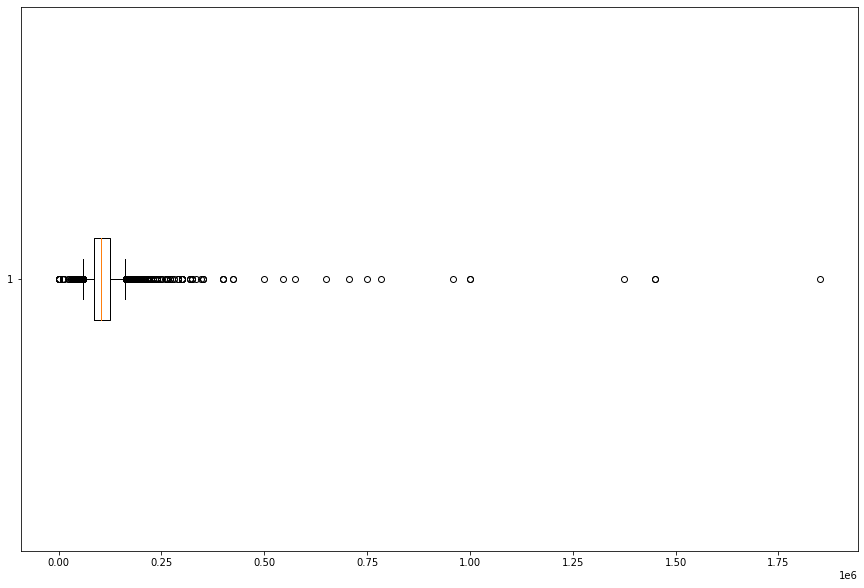

In [99]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure(figsize = (15,10))
ax = plt.boxplot(df_usa["SalaryUSD"], whis=[5,95], vert=False)

plt.show()

on peut observer des valeurs extremes, je supprime celel supérieures a 0.38


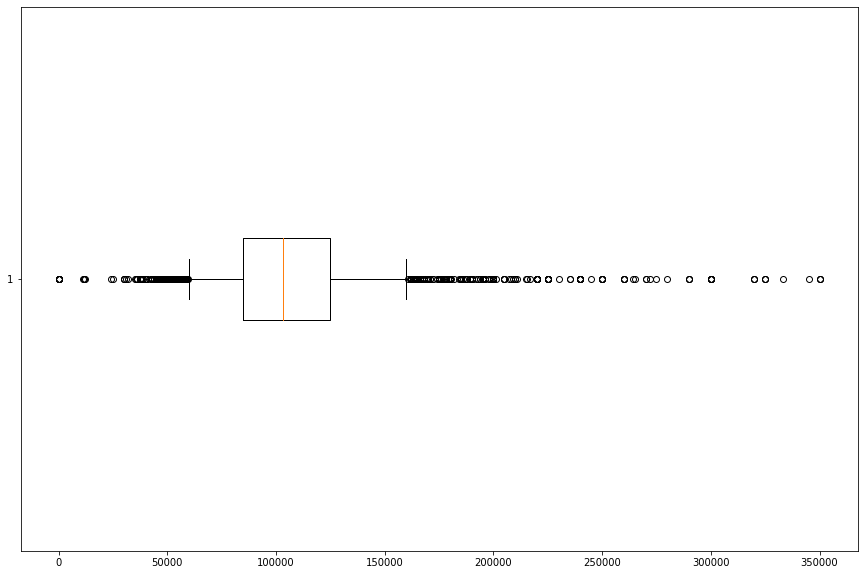

In [109]:
df_last= df_usa[ df_usa['SalaryUSD'] <= 0.38*10e5 ]



plt.figure(figsize = (15,10))
ax = plt.boxplot(df_last["SalaryUSD"], whis=[5,95], vert=False)

plt.show()

## Save cleaned database

In [110]:
save_to_mysql(db_connection,df_last,"cleaned_survey")